In [3]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

Для визначення дублікатів картинок за допомогою `numpy` та `pillow` я аналізував 2 підходи

* Перцептивний хеш
* ImageSignature


### Перцептивний хеш
Перевірка на схожість проводиться шляхом підрахунку кількості відмінних позицій між двома хешамі, яку Хеммінга.

**Не працює з**
- Кроп
- Поворот
- Зміна положення кривих в RGB-каналах

### ImageSignature
Спочатку растрова картинка розбивається на блоки - автоматично відкидаються рамки, що не несуть особливо значимої інформації. Різниця між суміжними блоками формує вектор - це так звана підпис картинки. Схожість картинок визначається відстанню між двома такими векторами. Тому зазвичай зміна кольору, ресайз або стиск не впливають на результати.

## Test solution

In [1]:
!python solution.py --path ./datasets/

11_duplicate.jpg 11.jpg
1.jpg 1_duplicate.jpg
11_duplicate.jpg 11_modification.jpg
11.jpg 11_modification.jpg
15.jpg 15_modification.jpg
6_similar.jpg 6.jpg
4.jpg 4_similar.jpg


In [4]:
from imagesignature import ImageSignature

In [5]:
def average_hash(image, hash_size=8):
    image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)
    pixels = np.array(image.getdata()).reshape((hash_size, hash_size))
    avg = pixels.mean()
    diff = pixels > avg

    return diff

In [8]:
image = Image.open('./datasets/4.jpg')

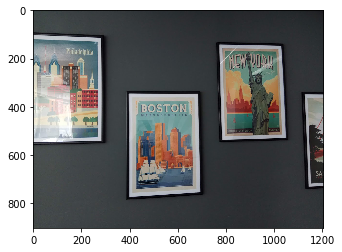

In [9]:
plt.imshow(image)

## Перцептивний хеш¶

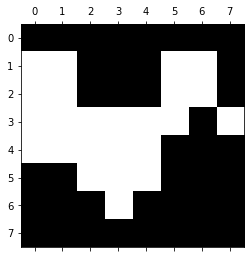

In [10]:
hash = average_hash(image)
plt.matshow(hash, cmap=plt.cm.gray)

## ImageSignature¶

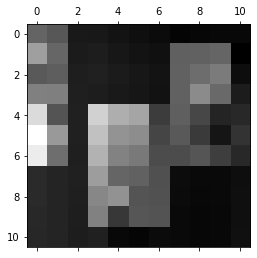

In [13]:
grid_size = 11
sig = ImageSignature()
pixels = np.asarray(image.convert("L"))
boundaries = sig.crop(pixels)

x_coords = np.linspace(boundaries[0][0], boundaries[0][1], grid_size + 2, dtype=int)[1:-1]
y_coords = np.linspace(boundaries[1][0], boundaries[1][1], grid_size + 2, dtype=int)[1:-1]

avg_grey = sig.average_gray(pixels, x_coords, y_coords)
plt.matshow(avg_grey, cmap=plt.cm.gray)

Схожість картинок за допомогою `перцептивного хешу`

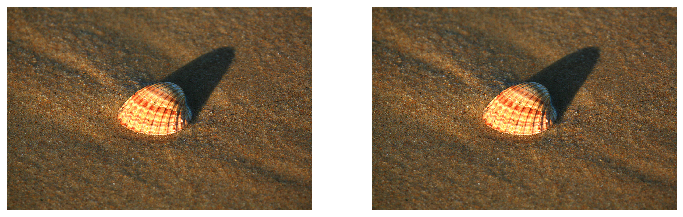

In [40]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(Image.open('./datasets/1.jpg'))
ax1.axis('off')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Image.open('./datasets/1_duplicate.jpg'))
ax2.axis('off')
plt.show()

In [19]:
# Duplicate
a = sig.signature(Image.open('./datasets/1.jpg'))
b = sig.signature(Image.open('./datasets/1_duplicate.jpg'))
sig.normalized_distance(a, b)

0.0

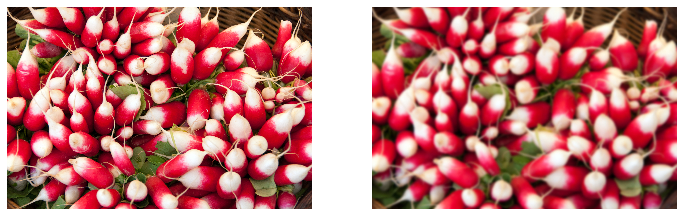

In [39]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(Image.open('./datasets/11.jpg'))
ax1.axis('off')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Image.open('./datasets/11_modification.jpg'))
ax2.axis('off')
plt.show()

In [20]:
# Blur
a = sig.signature(Image.open('./datasets/11.jpg'))
b = sig.signature(Image.open('./datasets/11_modification.jpg'))
sig.normalized_distance(a, b)

0.048795003647426664

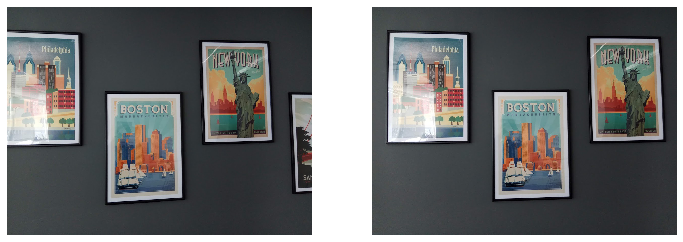

In [38]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(Image.open('./datasets/4.jpg'))
ax1.axis('off')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Image.open('./datasets/4_similar.jpg'))
ax2.axis('off')
plt.show()

In [21]:
# Crop
a = sig.signature(Image.open('./datasets/4.jpg'))
b = sig.signature(Image.open('./datasets/4_similar.jpg'))
sig.normalized_distance(a, b)

0.600572519605246

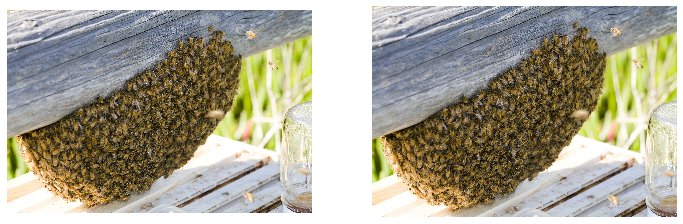

In [37]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(Image.open('./datasets/15.jpg'))
ax1.axis('off')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Image.open('./datasets/15_modification.jpg'))
ax2.axis('off')
plt.show()

In [22]:
# Crop
a = sig.signature(Image.open('./datasets/15.jpg'))
b = sig.signature(Image.open('./datasets/15_modification.jpg'))
sig.normalized_distance(a, b)

0.08164965809277261

Схожість картинок за допомогою `ImageSignature`

In [16]:
a = average_hash(Image.open('./datasets/4.jpg'))
b = average_hash(Image.open('./datasets/4_similar.jpg'))

In [18]:
np.count_nonzero(a.flatten() != b.flatten())

8

## References

[Как работает перцептивный хэш](https://habr.com/ru/post/120562/)
[Построение SIFT дескрипторов и задача сопоставления изображений](https://habr.com/ru/post/106302/)
[Introduction to ORB (Oriented FAST and Rotated BRIEF)]()
